In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Performance Plot

#extract accuracies from the outputs:


file_name = "../word2brain_glove_primary_results"
with open(file_name,'r') as fin:
    all_lines = fin.readlines()

c_accs = []
e_accs = []
for line in all_lines:
    if line.startswith("binary accuracy:"):
        parts = line.split()
        c_accs.append(parts[2])
        e_accs.append(parts[3])
        
print("Hlloooo")
    

Hlloooo


In [24]:
test_indexes = np.arange(0,len(c_accs),2)
train_indexes = np.arange(1,len(c_accs),2)

In [25]:
test_c_accs = np.asarray(c_accs)[test_indexes]
test_e_accs = np.asarray(e_accs)[test_indexes]

In [26]:
train_c_accs = np.asarray(c_accs)[train_indexes]
train_e_accs = np.asarray(e_accs)[train_indexes]

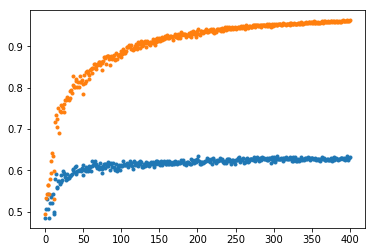

In [33]:
plt.plot(np.arange(len(test_c_accs)),test_c_accs, '.',np.arange(len(train_c_accs)),train_c_accs, '.')
plt.show()